In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0, 1, n_steps)
  series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) # wave 1
  series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
  series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # + noise
  return series[..., np.newaxis].astype(np.float32)

In [2]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

Baseline metric to compare against

In [103]:
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred)) #0.021

array([[-0.60147893],
       [-0.5715685 ],
       [-0.49408132],
       [-0.36458835],
       [-0.1633233 ],
       [ 0.08066054],
       [ 0.20814769],
       [ 0.4024161 ],
       [ 0.6093572 ],
       [ 0.622528  ],
       [ 0.7345643 ],
       [ 0.6923389 ],
       [ 0.61453587],
       [ 0.4516329 ],
       [ 0.21232449],
       [ 0.09670633],
       [-0.13734113],
       [-0.37681854],
       [-0.5232703 ],
       [-0.6169976 ],
       [-0.64949024],
       [-0.6618245 ],
       [-0.58609545],
       [-0.50407904],
       [-0.3636418 ],
       [-0.12228565],
       [ 0.06983643],
       [ 0.19218604],
       [ 0.35037795],
       [ 0.53170633],
       [ 0.5964063 ],
       [ 0.6200076 ],
       [ 0.5404551 ],
       [ 0.43860918],
       [ 0.34303153],
       [ 0.23251805],
       [ 0.0460497 ],
       [-0.12197661],
       [-0.1865361 ],
       [-0.3375187 ],
       [-0.42171356],
       [-0.4615772 ],
       [-0.47400096],
       [-0.38434836],
       [-0.37364498],
       [-0

Linear Regression Model

In [4]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[50, 1]),
  keras.layers.Dense(1)
  ])

In [5]:
model.compile(optimizer =tf.keras.optimizers.Adam(), loss = "mse")

In [6]:
model.fit(X_train,y_train, epochs = 20, validation_data= (X_valid, y_valid)) # validation loss ~ 0.004

Epoch 1/20
219/219 [==============================] - 2s 6ms/step - loss: 0.1798 - val_loss: 0.0764
Epoch 2/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0452 - val_loss: 0.0312
Epoch 3/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0211 - val_loss: 0.0165
Epoch 4/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0128 - val_loss: 0.0111
Epoch 5/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.0087
Epoch 6/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0075
Epoch 7/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 8/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0059
Epoch 9/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 10/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0050

## Set-up for plotting and saving plots

In [46]:
import os

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [47]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Simple RNN

In [7]:

def make_rnn(learning_rate = 0.01):
  model = keras.models.Sequential([
  keras.layers.SimpleRNN(1, input_shape=[None, 1])
  ])

  model.compile(optimizer =tf.keras.optimizers.Adam(learning_rate = learning_rate), loss = "mse")

  return model

keras_rnn = keras.wrappers.scikit_learn.KerasRegressor(make_rnn)


C:\Users\kuhnn\AppData\Local\Temp\ipykernel_25540\44280139.py:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_rnn = keras.wrappers.scikit_learn.KerasRegressor(make_rnn)


In [8]:
#Find optimal learning rate 
from sklearn.model_selection import GridSearchCV


params = { 'learning_rate' : [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1] }
rnn_grid_search = GridSearchCV(keras_rnn, params, cv=3, n_jobs = -1)


In [9]:
rnn_grid_search.fit(X_train,y_train, epochs = 20, validation_data= (X_valid, y_valid))  #best is 0.01

Epoch 1/20
219/219 [==============================] - 9s 37ms/step - loss: 0.0736 - val_loss: 0.0119
Epoch 2/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0111 - val_loss: 0.0116
Epoch 3/20
219/219 [==============================] - 8s 37ms/step - loss: 0.0111 - val_loss: 0.0118
Epoch 4/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0111 - val_loss: 0.0117
Epoch 5/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0111 - val_loss: 0.0116
Epoch 6/20
219/219 [==============================] - 7s 33ms/step - loss: 0.0111 - val_loss: 0.0116
Epoch 7/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0112 - val_loss: 0.0119
Epoch 8/20
219/219 [==============================] - 8s 36ms/step - loss: 0.0112 - val_loss: 0.0117
Epoch 9/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0112 - val_loss: 0.0116
Epoch 10/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0111 - val_lo

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000029EB6B30310>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3,
                                           1]})

In [10]:
model = make_rnn()
model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid,y_valid)) # Validation loss 0.011

Epoch 1/20
219/219 [==============================] - 4s 14ms/step - loss: 0.1932 - val_loss: 0.1048
Epoch 2/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0578 - val_loss: 0.0384
Epoch 3/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0301 - val_loss: 0.0258
Epoch 4/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0219 - val_loss: 0.0201
Epoch 5/20
219/219 [==============================] - 8s 36ms/step - loss: 0.0177 - val_loss: 0.0169
Epoch 6/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0152 - val_loss: 0.0148
Epoch 7/20
219/219 [==============================] - 7s 32ms/step - loss: 0.0135 - val_loss: 0.0134
Epoch 8/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0124 - val_loss: 0.0126
Epoch 9/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0118 - val_loss: 0.0120
Epoch 10/20
219/219 [==============================] - 8s 36ms/step - loss: 0.0114 - val_lo

## Deep RNN

In [28]:
def build_deep_rnn(learning_rate =0.01):
    model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)])
    
    model.compile(optimizer =tf.keras.optimizers.Adam(learning_rate = learning_rate), loss = "mse")
    return model

keras_deep_rnn = keras.wrappers.scikit_learn.KerasRegressor(build_deep_rnn)


C:\Users\kuhnn\AppData\Local\Temp\ipykernel_25540\3299738370.py:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_deep_rnn = keras.wrappers.scikit_learn.KerasRegressor(build_deep_rnn)


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_77 (SimpleRNN)   (None, None, 20)          440       
                                                                 
 simple_rnn_78 (SimpleRNN)   (None, None, 20)          820       
                                                                 
 simple_rnn_79 (SimpleRNN)   (None, 1)                 22        
                                                                 
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [32]:
from sklearn.model_selection import GridSearchCV


params = { 'learning_rate' : [0.001, 0.003, 0.01, 0.03, 0.1, 0.3] }
deep_rnn_grid_search = GridSearchCV(keras_deep_rnn, params, cv=3, n_jobs = -1)

In [16]:
deep_rnn_grid_search.fit(X_train,y_train, epochs = 10, validation_data= (X_valid, y_valid)) # best is 0.003


Epoch 1/20
146/146 [==============================] - 4s 18ms/step - loss: 0.0112 - val_loss: 0.0116
Epoch 2/20
146/146 [==============================] - 2s 13ms/step - loss: 0.0112 - val_loss: 0.0116
Epoch 3/20
146/146 [==============================] - 2s 13ms/step - loss: 0.0112 - val_loss: 0.0116
Epoch 4/20
146/146 [==============================] - 7s 49ms/step - loss: 0.0112 - val_loss: 0.0117
Epoch 5/20
146/146 [==============================] - 2s 13ms/step - loss: 0.0112 - val_loss: 0.0116
Epoch 6/20
146/146 [==============================] - 2s 13ms/step - loss: 0.0112 - val_loss: 0.0117
Epoch 7/20
146/146 [==============================] - 3s 23ms/step - loss: 0.0112 - val_loss: 0.0116
Epoch 8/20
146/146 [==============================] - 5s 37ms/step - loss: 0.0112 - val_loss: 0.0116
Epoch 9/20
146/146 [==============================] - 2s 13ms/step - loss: 0.0112 - val_loss: 0.0116
Epoch 10/20
146/146 [==============================] - 2s 15ms/step - loss: 0.0112 - val_lo

146/146 [==============================] - 2s 16ms/step - loss: 0.0109 - val_loss: 0.0118
Epoch 18/20
146/146 [==============================] - 2s 16ms/step - loss: 0.0110 - val_loss: 0.0118
Epoch 19/20
146/146 [==============================] - 2s 15ms/step - loss: 0.0110 - val_loss: 0.0117
Epoch 20/20
73/73 [==============================] - 0s 5ms/step - loss: 0.0114
Epoch 1/20
146/146 [==============================] - 4s 20ms/step - loss: 0.0110 - val_loss: 0.0116
Epoch 2/20
146/146 [==============================] - 3s 18ms/step - loss: 0.0110 - val_loss: 0.0116
Epoch 3/20
146/146 [==============================] - 3s 18ms/step - loss: 0.0110 - val_loss: 0.0117
Epoch 4/20
146/146 [==============================] - 3s 17ms/step - loss: 0.0110 - val_loss: 0.0117
Epoch 5/20
146/146 [==============================] - 3s 17ms/step - loss: 0.0110 - val_loss: 0.0117
Epoch 6/20
146/146 [==============================] - 3s 18ms/step - loss: 0.0111 - val_loss: 0.0117
Epoch 7/20
146/146 [

146/146 [==============================] - 2s 17ms/step - loss: 0.0124 - val_loss: 0.0121
Epoch 14/20
146/146 [==============================] - 2s 17ms/step - loss: 0.0126 - val_loss: 0.0125
Epoch 15/20
146/146 [==============================] - 2s 17ms/step - loss: 0.0126 - val_loss: 0.0139
Epoch 16/20
146/146 [==============================] - 2s 17ms/step - loss: 0.0134 - val_loss: 0.0192
Epoch 17/20
146/146 [==============================] - 2s 16ms/step - loss: 0.0126 - val_loss: 0.0123
Epoch 18/20
146/146 [==============================] - 2s 17ms/step - loss: 0.0138 - val_loss: 0.0118
Epoch 19/20
146/146 [==============================] - 2s 17ms/step - loss: 0.0129 - val_loss: 0.0153
Epoch 20/20
73/73 [==============================] - 0s 5ms/step - loss: 0.0107
Epoch 1/20
146/146 [==============================] - 4s 19ms/step - loss: 0.0133 - val_loss: 0.0128
Epoch 2/20
146/146 [==============================] - 3s 18ms/step - loss: 0.0122 - val_loss: 0.0129
Epoch 3/20
146/1

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000029EB6AE9970>,
             param_grid={'learning_rate': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3,
                                           1]})

In [26]:
deep_rnn_grid_search.cv_results_

{'mean_fit_time': array([69.79046448, 46.40899952, 48.70223149, 52.18334413, 54.0760231 ,
        53.92087277, 56.07534965]),
 'std_fit_time': array([1.75987223, 0.28080621, 1.71969508, 2.62750648, 2.02252121,
        0.637939  , 3.35441179]),
 'mean_score_time': array([0.39533337, 0.44100038, 0.44251037, 0.473001  , 0.5103337 ,
        0.5059998 , 0.47800088]),
 'std_score_time': array([0.02185491, 0.00864055, 0.01428922, 0.02060649, 0.02129659,
        0.03765509, 0.01557775]),
 'param_learning_rate': masked_array(data=[0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.001},
  {'learning_rate': 0.003},
  {'learning_rate': 0.01},
  {'learning_rate': 0.03},
  {'learning_rate': 0.1},
  {'learning_rate': 0.3},
  {'learning_rate': 1}],
 'split0_test_score': array([-0.0106574 , -0.01064806, -0.01099974, -0.01063733, -0.01102955,
        -0.0107236 

In [30]:
deep_model = build_deep_rnn(learning_rate =0.003) 
deep_model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_80 (SimpleRNN)   (None, None, 20)          440       
                                                                 
 simple_rnn_81 (SimpleRNN)   (None, None, 20)          820       
                                                                 
 simple_rnn_82 (SimpleRNN)   (None, 1)                 22        
                                                                 
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = deep_model.fit(X_train,y_train, epochs = 20, validation_data= (X_valid, y_valid)) # loss 0.0030 after 4 epochs

Epoch 1/20
219/219 [==============================] - 45s 44ms/step - loss: 0.0095 - val_loss: 0.0037
Epoch 2/20
219/219 [==============================] - 10s 47ms/step - loss: 0.0034 - val_loss: 0.0040
Epoch 3/20
219/219 [==============================] - 10s 47ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 4/20
219/219 [==============================] - 11s 48ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 5/20
219/219 [==============================] - 10s 46ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 6/20
219/219 [==============================] - 11s 52ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 7/20
219/219 [==============================] - 10s 45ms/step - loss: 0.0029 - val_loss: 0.0040
Epoch 8/20
219/219 [==============================] - 11s 51ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 9/20
219/219 [==============================] - 12s 53ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 10/20
219/219 [==============================] - 11s 49ms/step - loss: 0.003

## Replace last layer with Dense

In [33]:
learning_rate = 0.005

model = keras.models.Sequential([
keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
keras.layers.SimpleRNN(20),
keras.layers.Dense(1)])

model.compile(optimizer =tf.keras.optimizers.Adam(learning_rate = learning_rate), loss = "mse")

In [36]:
model.fit(X_train, y_train, epochs = 5, validation_data = (X_valid, y_valid)) # loss ~ 0.003 -0.004

Epoch 1/5
219/219 [==============================] - 5s 25ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 2/5
219/219 [==============================] - 9s 43ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 3/5
219/219 [==============================] - 9s 43ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 4/5
219/219 [==============================] - 6s 25ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 5/5
219/219 [==============================] - 10s 44ms/step - loss: 0.0032 - val_loss: 0.0032


## Predict multiple steps

In [38]:
series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new

for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

    
Y_pred = X[:, n_steps:]

1/1 [==============================] - 0s 24ms/step


Saving figure forecast_ahead_plot


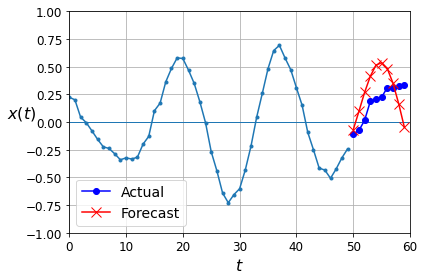

In [48]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "bo-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "rx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

plot_multiple_forecasts(X_new, Y_new, Y_pred)
save_fig("forecast_ahead_plot")
plt.show()

In [90]:
n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:,0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [91]:
model_3 = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
    ])

In [92]:

model_3.compile(optimizer = 'adam', loss = "mse")

In [93]:
model_3.fit(X_train, Y_train, epochs =20, validation_data = (X_valid, Y_valid)) #standard lr with adam, 20 epochs :error ~0.009

Epoch 1/20
219/219 [==============================] - 9s 24ms/step - loss: 0.0657 - val_loss: 0.0294
Epoch 2/20
219/219 [==============================] - 10s 44ms/step - loss: 0.0241 - val_loss: 0.0222
Epoch 3/20
219/219 [==============================] - 9s 43ms/step - loss: 0.0178 - val_loss: 0.0152
Epoch 4/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0142 - val_loss: 0.0136
Epoch 5/20
219/219 [==============================] - 10s 45ms/step - loss: 0.0130 - val_loss: 0.0132
Epoch 6/20
219/219 [==============================] - 10s 45ms/step - loss: 0.0121 - val_loss: 0.0112
Epoch 7/20
219/219 [==============================] - 8s 35ms/step - loss: 0.0115 - val_loss: 0.0115
Epoch 8/20
219/219 [==============================] - 8s 37ms/step - loss: 0.0110 - val_loss: 0.0105
Epoch 9/20
219/219 [==============================] - 10s 46ms/step - loss: 0.0103 - val_loss: 0.0100
Epoch 10/20
219/219 [==============================] - 10s 46ms/step - loss: 0.0105 - v

In [88]:
def plot_multiple_forecasts_2(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :], "bo-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :], "rx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)


(1000, 10)
(1000, 10)
Saving figure forecast_ahead_trained_ahead_plot


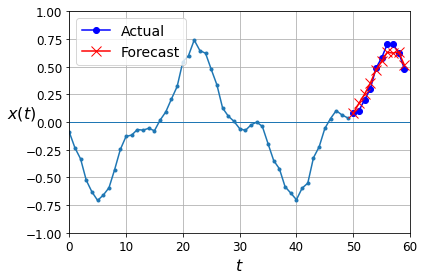

In [95]:
Y_pred = model_3(X_test)
print(Y_test.shape)
print(Y_pred.shape) 
plot_multiple_forecasts_2(X_test, Y_test, Y_pred)
save_fig("forecast_ahead_trained_ahead_plot")
plt.show()

## Sequence-to-sequence prediction

In [96]:
Y = np.empty((10000, n_steps, 10)) # each target is a sequence of 10D vectors
for step_ahead in range(1, 10 + 1):
    Y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]

Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [97]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
    ])

In [98]:
#custom metric for evaluation
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss="mse", optimizer=optimizer, metrics= [last_time_step_mse])

C:\Users\kuhnn\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [100]:
model.fit(X_train, Y_train, epochs = 20, validation_data = (X_valid, Y_valid)) #Reaches 0.006 validation loss

Epoch 1/20
219/219 [==============================] - 6s 25ms/step - loss: 0.0407 - last_time_step_mse: 0.0287 - val_loss: 0.0394 - val_last_time_step_mse: 0.0274
Epoch 2/20
219/219 [==============================] - 8s 38ms/step - loss: 0.0329 - last_time_step_mse: 0.0209 - val_loss: 0.0287 - val_last_time_step_mse: 0.0160
Epoch 3/20
219/219 [==============================] - 6s 28ms/step - loss: 0.0286 - last_time_step_mse: 0.0169 - val_loss: 0.0269 - val_last_time_step_mse: 0.0155
Epoch 4/20
219/219 [==============================] - 7s 31ms/step - loss: 0.0265 - last_time_step_mse: 0.0151 - val_loss: 0.0257 - val_last_time_step_mse: 0.0141
Epoch 5/20
219/219 [==============================] - 10s 46ms/step - loss: 0.0258 - last_time_step_mse: 0.0145 - val_loss: 0.0253 - val_last_time_step_mse: 0.0128
Epoch 6/20
219/219 [==============================] - 10s 45ms/step - loss: 0.0249 - last_time_step_mse: 0.0135 - val_loss: 0.0248 - val_last_time_step_mse: 0.0133
Epoch 7/20
219/219 [

## Regularizing RNN's: Layer Normalization

In [101]:
class LNSimpleRNNCell(keras.layers.Layer):
    
    def __init__(self, units, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = keras.layers.SimpleRNNCell(units,
            activation=None)
        self.layer_norm = keras.layers.LayerNormalization()
        self.activation = keras.activations.get(activation)

    def call(self, inputs, states):
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs]

In [102]:
model = keras.models.Sequential([
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True,
    input_shape=[None, 1]),
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])